In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner
import emcee
import json

In [6]:
pfile = "tests/files/real_mini_cube.json"
with open(pfile) as f:
    mcmc_dict = json.load(f)

# Select from dictionary the necessary parameters to be changed
labels = mcmc_dict['mcmc']['parameter_order']

# labels = ["sfr_n", "alpha", "lmean", "lsigma", "lEmax", "gamma", "H0"]

filenames = ['mcmc/w32_s1000_1', 'mcmc/w32_s1000_2']
# filenames = ['mcmc/w16_s500_4']
samples = []

for filename in filenames:
    reader = emcee.backends.HDFBackend(filename + '.h5')
    samples.append(reader.get_chain())

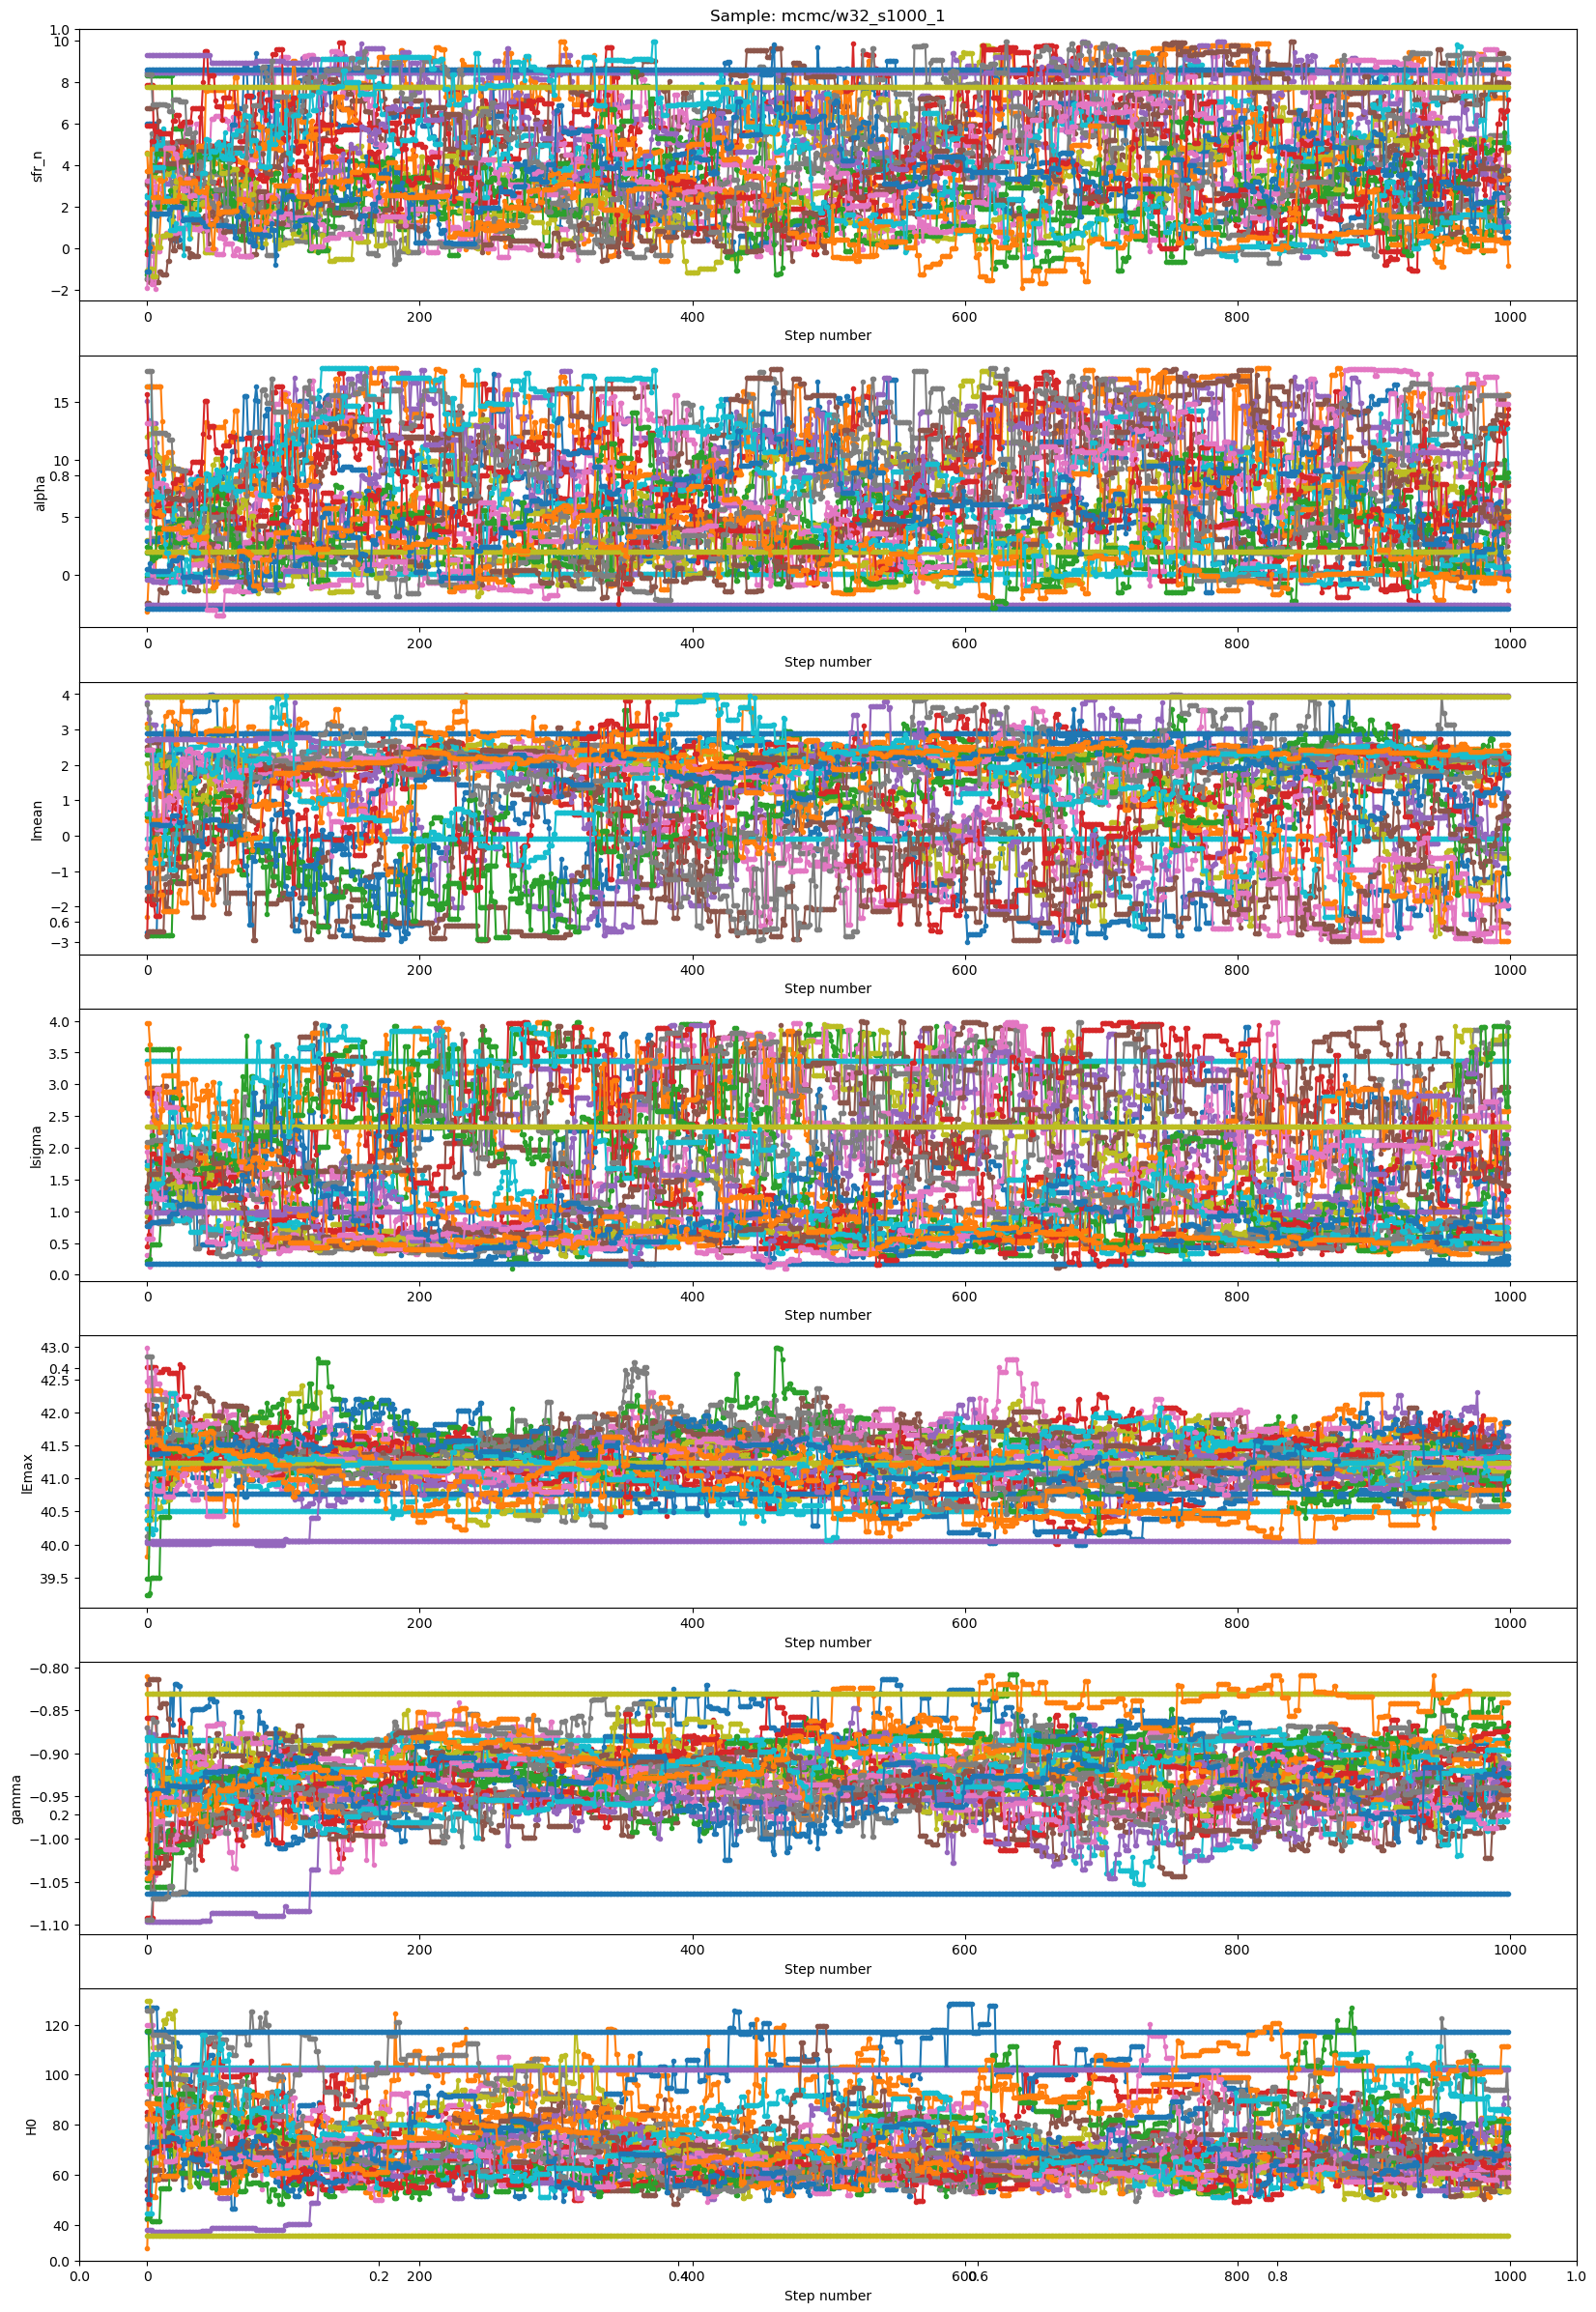

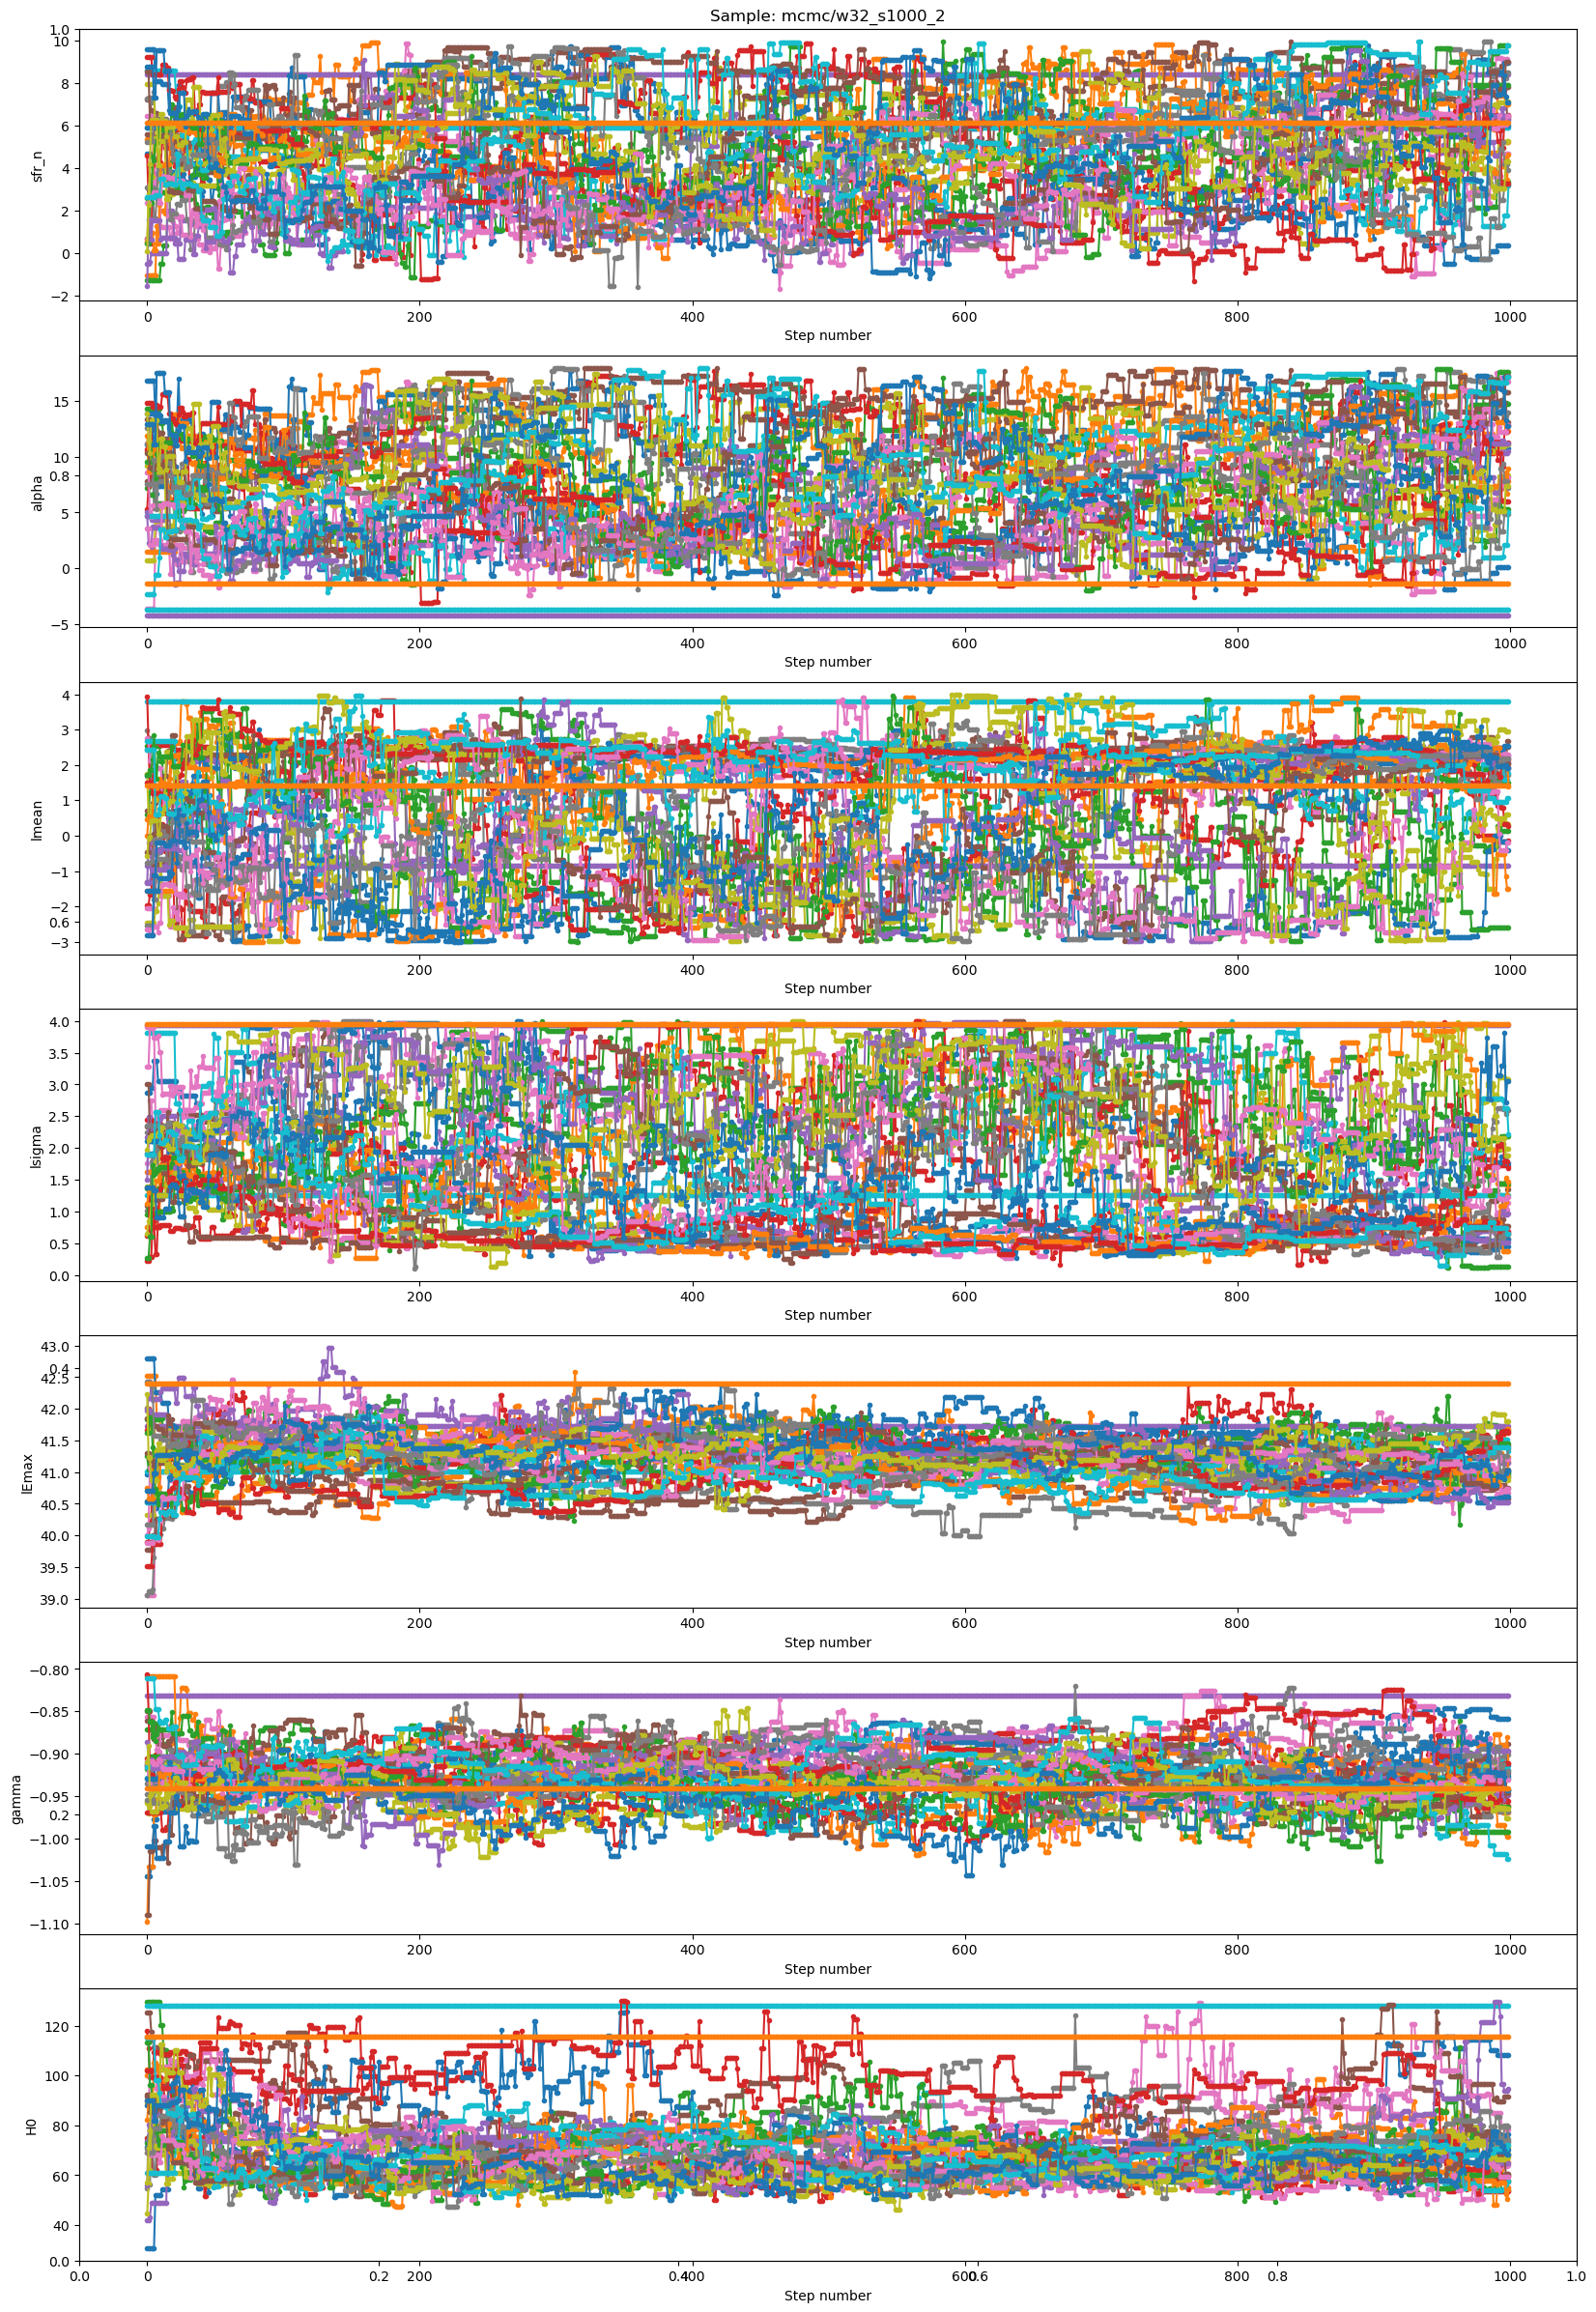

In [7]:
for j,sample in enumerate(samples):
    fig = plt.figure(figsize=(20,30))
    plt.title("Sample: " + filenames[j])
    for i in range(sample.shape[2]):
        ax = fig.add_subplot(sample.shape[2],1,i+1)

        for j in range(sample.shape[1]):
            ax.plot(sample[:,j,i], '.-', label=str(j))

        ax.set_xlabel("Step number")
        ax.set_ylabel(labels[i])


In [10]:
final_sample = [[] for i in range(samples[0].shape[2])]
for j,sample in enumerate(samples): 
    burnin=200
    good_walkers = []
    bad_walkers = []

    for i in range(sample.shape[1]):
        if np.all(sample[burnin:burnin+30,i,0] == sample[burnin,i,0]):
            bad_walkers.append(i)
        else:
            good_walkers.append(i)

    print("Discarded walkers for " + filenames[j] + ": " + str(bad_walkers))

    for i in range(sample.shape[2]):
        final_sample[i].append(sample[burnin:,good_walkers,i].flatten())

final_sample = np.array([np.concatenate(final_sample[i]) for i in range(len(final_sample))]).T
print(final_sample.shape)

Discarded walkers for mcmc/w32_s1000_1: [9, 14, 20, 28]
Discarded walkers for mcmc/w32_s1000_2: [4, 9, 31]
(45600, 7)


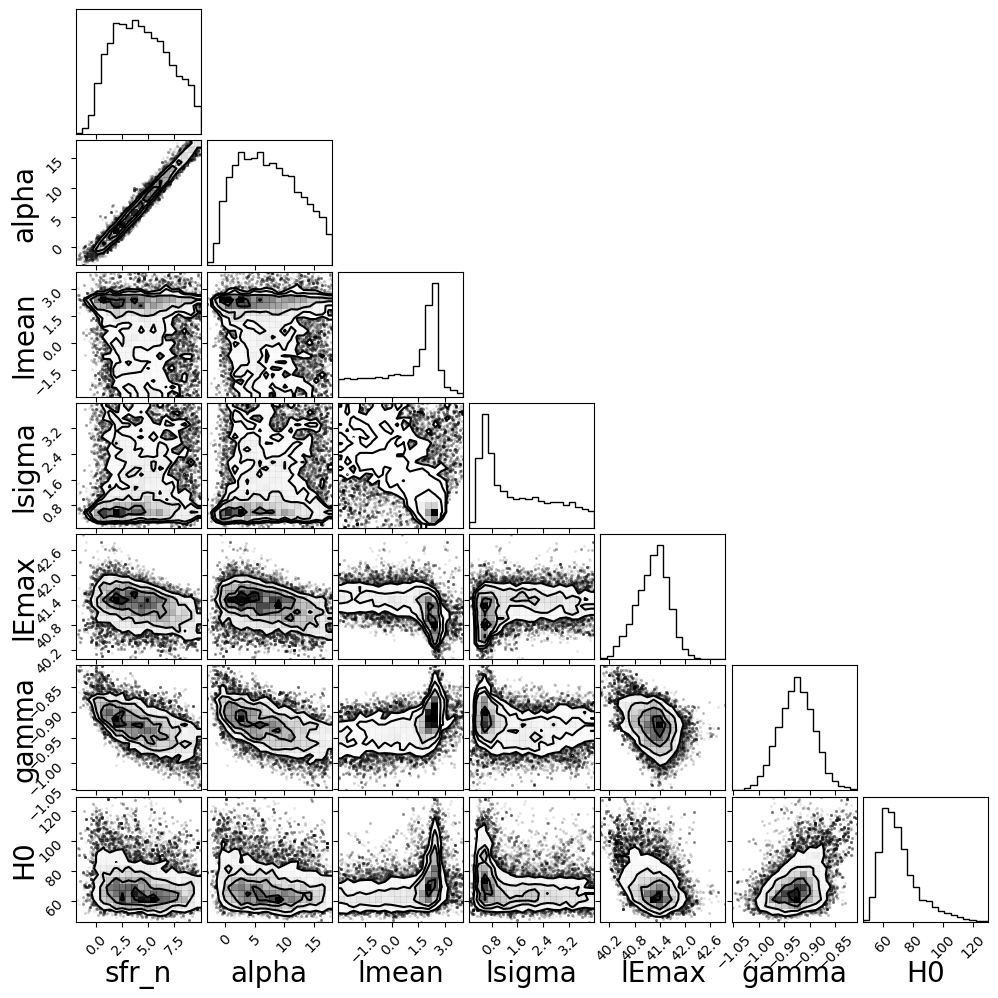

In [9]:
fig = plt.figure(figsize=(10,10))
corner.corner(final_sample,labels=labels, show_titles=False, fig=fig,title_kwargs={"fontsize": 20},label_kwargs={"fontsize": 20});

In [11]:
for i in range(len(labels)):
    mean = np.mean(final_sample[:,i])
    lower = np.quantile(final_sample[:,i], 0.17)
    u_lower = mean - lower
    upper = np.quantile(final_sample[:,i], 0.83)
    u_upper = upper - mean

    print(f'{labels[i]}: {mean} (-{u_lower}/+{u_upper})')
    

sfr_n: 4.327608147197622 (-2.7170914959681367/+2.806886108845778)
alpha: 7.275401644784912 (-5.280533907933245/+5.464956950938273)
lmean: 0.953930305129915 (-2.107373998314252/+1.4511755713186743)
lsigma: 1.619064371771923 (-1.0589917208243862/+1.2790730396540078)
lEmax: 41.227825886096625 (-0.3832510598410437/+0.35258748758477765)
gamma: -0.9258672490845086 (-0.03404843619058573/+0.03309040525967688)
H0: 70.63906567091725 (-11.052775703672452/+10.718452777335344)
